# Introduction

Welcome to our presentation on what the best neighborhood in Pittsburgh is. For our approach, we decided to focus on the general quality of living as our metric.

Our inspiration for the metric began with considering what a future-homeowner or resident might consider when deciding where to live. We felt that such an individual would consider many factors, such as access to amenities, crime statistics, and more, which all falls in line with the quality of daily life in that neighborhood. We considered alternative metrics, such as economic growth, but ultimately decided that the general quality of living would be the largest factor for the residents. 

We hope that this project will not only help us identify the best neighborhood in Pittsburgh, but also provide valuable insights into what makes a neighborhood desirable.

# The Metric

Describe your metric, what features are you measuring. What datasets are you using?

**Parks Submetric**
1. Parks - https://data.wprdc.org/dataset/parks1

This dataset, titled Parks, was collected by the City of Pittsburgh. It provides hundreds of parks, listing various variations of their names, acreage, square footage, maintenance responsibility, and even the type of park. The features we utilize are the various park names and square footage. Notably, this dataset is missing neighborhood names. 

2. City of Pittsburgh Parks - https://data.wprdc.org/dataset/parks

The second dataset, City of Pittsburgh Parks, makes up for what the first dataset is missing by including neighborhood names. Other than that, it contains park names, types, as well as their public service divisions. The only features utilized are the park names and neighborhood names.


**Parks**

Parks can substantially improve the quality of life in a neighborhood. They offer multiple benefits, such as providing recreational opportunities, enhancing the beauty of the area, and even boosting property values. The access to parks could also have a positive impact on physical and mental health by offering a place to congregate, exercise, and just enjoy the weather. They provide a safe and accessible space for the community.

For these reasons, many individuals and families might prioritize living in neighborhoods with parks, making it a good way to determine the "best" neighborhood with the "best" quality of life. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#https://data.wprdc.org/dataset/parks1/resource/bb57d0a7-e8ee-4218-8906-0dedc903038c
parks = pd.read_csv("park.csv")
#https://data.wprdc.org/dataset/parks/resource/fa329e3d-89ff-4708-8ddf-81bfedcad11d?inner_span=True
parksWithArea = pd.read_csv("parksWithArea.csv")

For the metrics, we look at two seperate park-related datasets from WPRDC. The features we care about are the names of the parks, the neighborhoods the parks are located in, and the acreage of each park. 

One dataset contains neighborhood information, while the other contains acreage, so our process of cleaning ultimately combines the two.

In [8]:
parks.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


In [9]:
parksWithArea.head()

,objectid_1,objectid,acreage,sqft,final_cat,type,sector,origpkname,updatepknm,alterntnam,...,globalid,created_user,created_date,last_edited_user,last_edited_date,maintenanceresponsibility,dpw_ac,globalid_1,shape_area,shape_length
0,1202,36,0.959034,41775.367101,Neighborhood Park,NP,15,Cliffside Parklet,August Wilson Park,Cliffside Park,...,764d9a2f-719c-49c2-b747-8f276149bf04,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,Parks - Schenley,0.959034,f781af9c-9ec2-4b5e-b5c5-9cc21608635c,6709.199219,390.397012
1,1203,198,2.060117,89738.347520,Neighborhood Park,NP,2,Young Field,Young Field Park,Young Park,...,9b969f67-1f2e-4f4b-8556-e4ac49ca208e,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,Parks - Riverview,2.060117,659c4c55-50fc-4883-8606-76f029fcca47,14423.417969,511.980181
2,1204,158,0.468682,20415.724875,Neighborhood Park,NP,8,Revenue Park,Roland Lockridge Community Park,Roland Lockridge Community Park,...,44bbbdf5-c2db-451c-b880-9251b8211455,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,Parks - Frick,0.468682,04e61cab-bea6-47dd-964a-0723197726cf,3273.722656,236.488235
3,1205,72,1.955430,85178.182207,Neighborhood Park,NP,12,Friendship Park,Friendship Park,Friendship Park,...,f95cbafc-dcd8-493f-8b98-89745c6434ca,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,Parks - Highland,1.955430,22563a68-61d3-46f3-9d5c-4558ee12be1f,13686.265625,760.982871
4,1206,87,5.108070,222506.623799,Neighborhood Park,NP,12,Heths Playground,Heth's Park,Heth's Park,...,a6a4ac92-5a00-4af5-9f11-716e51079fea,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,Parks - Highland,5.108070,b5b34833-e1d5-430f-afcc-40a1670d545d,35767.898438,875.156997


In [10]:
#cleaning 

parks = parks.loc[parks.type=="Park"]
parks = parks[['name','neighborhood']]

parksWithArea = parksWithArea[['origpkname','updatepknm','alterntnam','acreage']]

#merging parks with similar dataframe that includes area, left-merge to keep neighborhood names, dropna only removes 3
#so it's inconsequential

parks = pd.merge(left=parks, right=parksWithArea, how='left', left_on='name', right_on='updatepknm')
parks = parks[['name','neighborhood','acreage']]
parks = parks.dropna()

The following graph shows the top 10 neighborhoods based on their total park acreage. By identifying the neighborhoods with the most park acreage, we can see which neighborhoods stand out as having significantly more, as well as generally understand which neighborhoods should be looked at for other metrics.

<Axes: title={'center': 'Top 10 Neighborhoods by Total Park Acreage'}, xlabel='Neighborhoods', ylabel='# of Park Acres'>

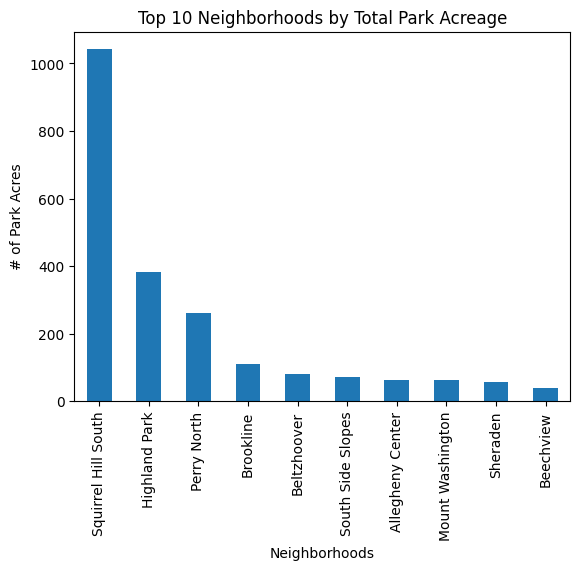

In [11]:
parks.groupby('neighborhood')['acreage'].sum().nlargest(10).plot(kind="bar",
                                                                title="Top 10 Neighborhoods by Total Park Acreage",
                                                                xlabel="Neighborhoods",
                                                                ylabel="# of Park Acres")

The following graph shows the top 10 neighborhoods based on total number of parks. Unlike the previous metric, this graph doesn't allow for the neighborhoods with very large parks to stand out. Multiple different parks can give residents more options, as well as ensure that every resident has a park near them instead of just distant large ones. 

<Axes: title={'center': 'Top 10 Neighborhoods by Total # of Parks'}, xlabel='Neighborhoods', ylabel='Total # of Parks'>

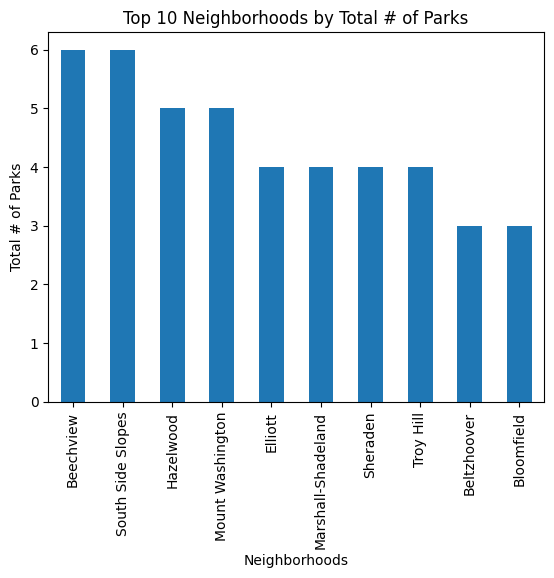

In [12]:
parks.groupby('neighborhood')['name'].count().nlargest(10).plot(kind="bar",
                                                               title="Top 10 Neighborhoods by Total # of Parks",
                                                               xlabel="Neighborhoods",
                                                               ylabel="Total # of Parks")

By looking at both of these graphs, we see that the following neighborhoods are top 10 both in park quantity and park acreage:

In acreage order:
1. Beltzhoover 6
2. South Side Slopes 4
3. Mount Washington 6
4. Sheraden 8
5. Beechview 6

In park # order:
1. Beechview
2. South Side Slopes
3. Mount Washington
4. Sheraden
5. Beltzhoover

By assigning each of these neighborhoods a number based on their order in both graphs, we can combine the numbers and determine a new order (with a lower number being ideal):

1. South Side Slopes
2. Beltzhoover
2. Mount Washington
2. Beechview
3. Sheraden

Beltzhoover, Mount Washington, and Beechview all tie for second. 

Based on this data, these 5 neighborhoods should be highly considered when looking at other metrics to determine the single neighborhood with the best quality of living.

## Crime submetric
Crime dataset - https://data.wprdc.org/dataset/uniform-crime-reporting-data/resource/044f2016-1dfd-4ab0-bc1e-065da05fca2e 

This data set is record of every singled crime that happned in pittsburgh neighborhoodssince 2016. There data holds information about the crime id, waht neigborhood, what the time was, what the date was, what the crime was, and longitude and lattitude.


One of the biggest things to look for when searching for a neighborhood for a future home is how safe it is. Finding a neighborhood with a low amount of crime is better for a person and their family's safety. Living in a home knowing that you and your family is safe leaves people with a peaceful mind contributing to a better quality of life.

In [3]:
crime = pd.read_csv("044f2016-1dfd-4ab0-bc1e-065da05fca2e.csv")

crime.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


In [4]:
# Calculating how many crime have happened in each neighborhood
crimeCount = dict()
i = 0
while i < len(crime):
    neighborhood = crime.loc[i,'INCIDENTNEIGHBORHOOD']
    if neighborhood in crimeCount.keys():
        crimeCount[neighborhood] += 1
    else: 
        crimeCount[neighborhood] = 1
    i += 1

print(crimeCount)

{'North Shore': 3424, 'Upper Lawrenceville': 1529, 'Northview Heights': 2462, 'Golden Triangle/Civic Arena': 4278, 'South Side Flats': 17627, 'Elliott': 2407, 'Homewood North': 6134, 'South Side Slopes': 3971, 'Carrick': 10945, 'South Oakland': 2223, nan: 6330, 'Bloomfield': 8150, 'Beechview': 5262, 'Bluff': 4330, 'Strip District': 3140, 'Mount Washington': 7053, 'East Carnegie': 389, 'Crafton Heights': 2611, 'Marshall-Shadeland': 5207, 'East Liberty': 7649, 'East Allegheny': 5569, 'Friendship': 1531, 'Arlington': 1973, 'Central Northside': 786, 'Spring Hill-City View': 2290, 'Brighton Heights': 5810, 'Westwood': 1536, 'East Hills': 4697, 'Brookline': 7130, 'South Shore': 1153, 'Lower Lawrenceville': 2380, 'Bedford Dwellings': 2432, 'Troy Hill-Herrs Island': 252, 'Central Oakland': 4879, 'Garfield': 3250, 'West End': 1162, 'West Oakland': 1809, 'Central Lawrenceville': 4104, 'Lincoln-Lemington-Belmar': 6272, 'Sheraden': 5596, 'Beltzhoover': 1928, 'Outside City': 2041, 'Squirrel Hill So

In [5]:
sort = dict(sorted(crimeCount.items(), key=lambda item: item[1]))
df = pd.DataFrame.from_dict(sort.items())
print(df)

                            0      1
0             Mt. Oliver Boro     94
1     Mt. Oliver Neighborhood    117
2              Outside County    226
3      Troy Hill-Herrs Island    252
4                   Ridgemont    282
..                        ...    ...
94                  Shadyside   8038
95                 Bloomfield   8150
96                    Carrick  10945
97  Central Business District  17353
98           South Side Flats  17627

[99 rows x 2 columns]


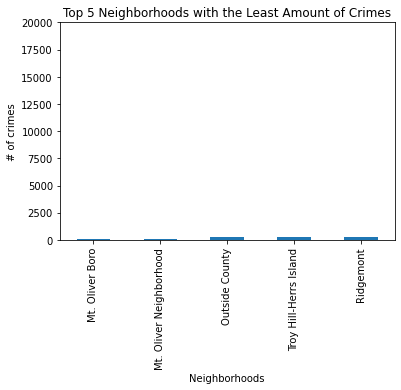

In [6]:
df.groupby(0)[1].sum().nsmallest(5).plot(kind = "bar", ylim = (0, 20000), xlabel = "Neighborhoods", ylabel = "# of crimes", title = "Top 5 Neighborhoods with the Least Amount of Crimes")

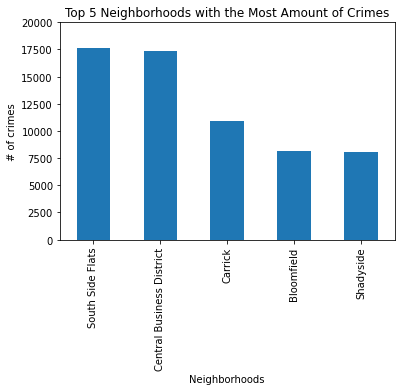

In [7]:
df.groupby(0)[1].sum().nlargest(5).plot(kind ="bar", ylim = (0, 20000), xlabel = "Neighborhoods", ylabel = "# of crimes", title = "Top 5 Neighborhoods with the Most Amount of Crimes")

As seen from the graphs there is a large difference between number of crimes between the neighborhoods.
The 5 neighborhoods with least amount of crimes in order are:
1. Mt. Oliver Boro
2. Mt. Oliver Neighborhood
3. Outside County
4. Troy Hill-Herrs Island
5. Ridgemont

These 5 are the best when it comes to fewest amounts of crime.

# The Best Neighborhood
Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data driven argument.z

# Conclusion
Reflect on how the data driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.